In [1]:
import utils_rag as ur

from cleaner_data import text_cleaner
import json 
from collections import defaultdict
from rich.markdown import Markdown as rich_Markdown

import time

In [3]:
# Ejemplo de uso
ruta_archivo = 'data/chunks_docs/dict_pdfs.json'
dict_pdfs = ur.cargar_json(ruta_archivo)


In [4]:
print(json.dumps(dict_pdfs, indent=4))

{
    "file1": {
        "file_path": "data/docs/DT_Golondrinas.pdf",
        "output_path": "data/chunks_docs/chunks_DT_Golondrinas.json"
    },
    "file2": {
        "file_path": "data/docs/Implementacion-y-aplicaciones-de-un-sistema-de-codificacion-automatica-de-la-lista-de-espera-chilena.pdf",
        "output_path": "data/chunks_docs/chunks_Implementacion-y-aplicaciones-de-un-sistema-de-codificacion-automatica-de-la-lista-de-espera-chilena.json"
    },
    "file3": {
        "file_path": "data/docs/DeepSeek_R1.pdf",
        "output_path": "data/chunks_docs/chunks_DeepSeek_R1.json"
    }
}


In [5]:
doc_1 = dict_pdfs['file2']
doc_2 = dict_pdfs['file1']
doc_3 = dict_pdfs['file3']
chunks_docs_1 = ur.ejecutar_chunking_pdf(doc_1,ejecutar_pdf=False)
chunks_docs_2 = ur.ejecutar_chunking_pdf(doc_2,ejecutar_pdf=False)
chunks_docs_3 = ur.ejecutar_chunking_pdf(doc_3,ejecutar_pdf=False)

In [23]:
chunks_docs_3[1].metadata.orig_elements[15].to_dict()

{'type': 'Title',
 'element_id': '59c2eca8-b709-485c-9407-3cf1226f2428',
 'text': '1. Introduction',
 'metadata': {'coordinates': {'points': ((193.3, 240.1),
    (193.3, 276.2),
    (451.0, 276.2),
    (451.0, 240.1)),
   'system': 'PixelSpace',
   'layout_width': 1654,
   'layout_height': 2339},
  'detection_class_prob': 0.85192,
  'filetype': 'PPM',
  'languages': ['eng'],
  'last_modified': '2025-01-22T23:33:40',
  'page_number': 3}}

In [91]:
chunks_docs_1[10].metadata.orig_elements[1].to_dict()

{'type': 'NarrativeText',
 'element_id': '5e9a4054-4cad-4e68-a573-18bba18a22e7',
 'text': 'En Chile, la salud pública es responsabilidad del Ministerio de Salud y se divide en 29 Servicios de Salud que cubren diferentes regiones del país. Cada uno de estos servicios está a cargo de la planificación, gestión y supervisión de los servicios de salud en su área geográfica. Los Servicios de Salud también supervisan la implementación de políticas de salud a nivel regional y coordinan la atención médica en los distintos niveles de atención [13], los cuales se explicarán a continuación.',
 'metadata': {'coordinates': {'points': ((236.2, 185.9),
    (236.2, 421.9),
    (1550.6, 421.9),
    (1550.6, 185.9)),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'detection_class_prob': 0.95447,
  'filetype': 'PPM',
  'languages': ['eng'],
  'last_modified': '2024-12-30T20:32:52',
  'page_number': 16}}

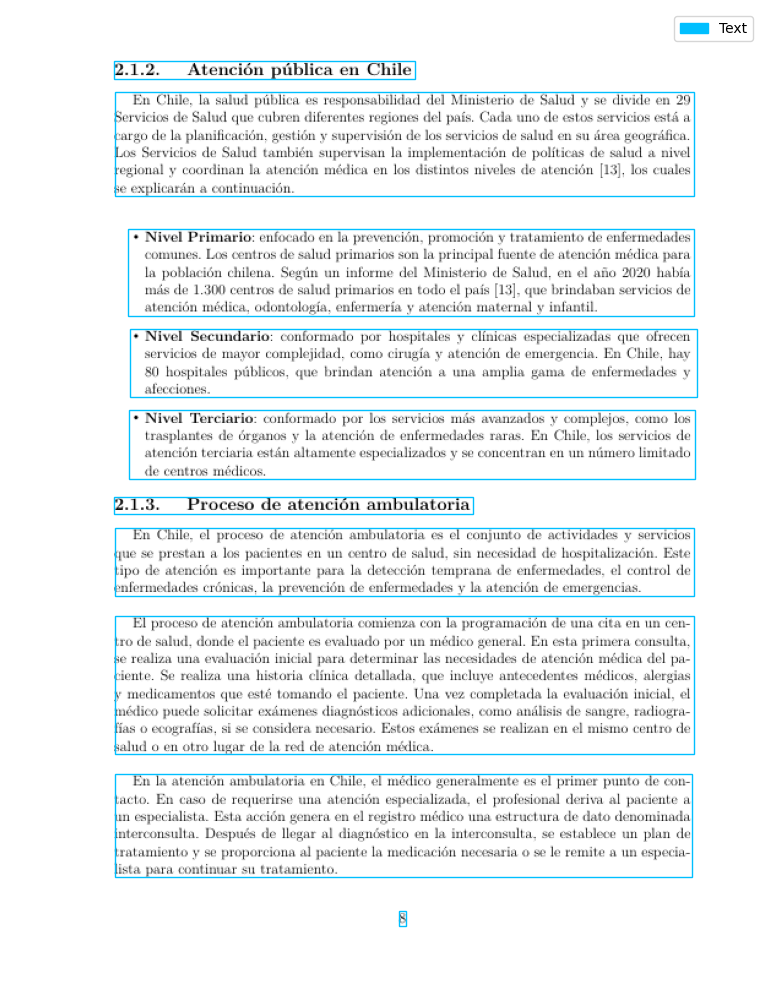

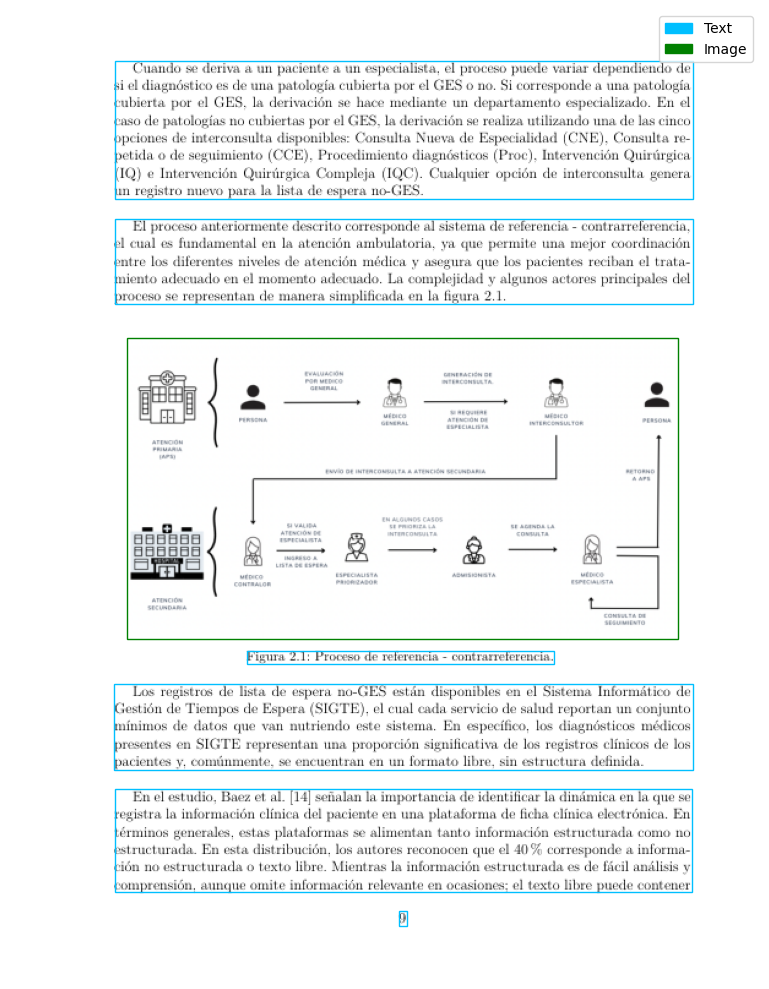

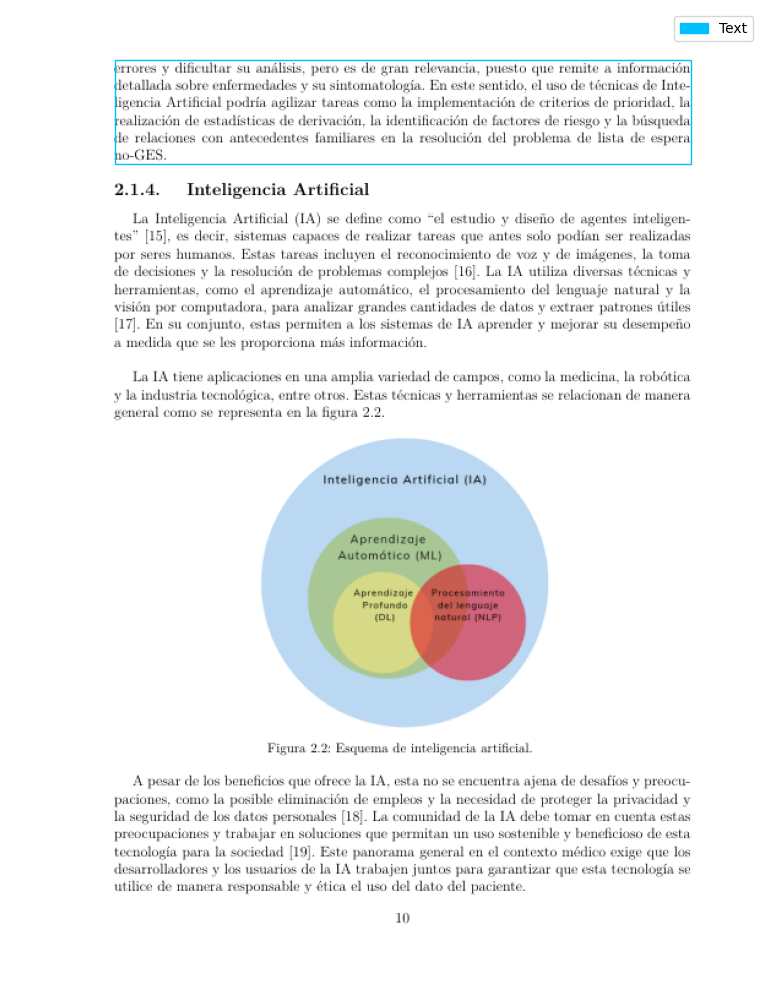

In [86]:
ur.display_chunk_pages(chunks_docs_1[10],doc_1['file_path'])

# Doc Tesis

In [24]:
chapters_1 = [
    "Introducción",
    "1.1. Problema",
    "1.2. Hipótesis",
    "1.3. Objetivos",
    "1.4. Organización de la tesis ",
    "2.1. Antecedentes",
    "2.2. Trabajos afines",
    "3.1. Análisis descriptivo",
    "3.2. Análisis de variables categóricas",
    "3.3. Modelamiento del problema",
    "3.4. Creación de Gold Standard y rendimiento humano",
    "3.5. Métricas utilizadas",
    "3.6. Despliegue",
    "4.1. Gold Standard y acuerdo humano",
    "4.2. Resultado de los modelos",
    "4.3. Limitaciones",

    "4.4. Despliegue",
    "5.1. Propuestas de aplicaciones en cáncer",
    "5.2. Un caso de aplicación: Dashboard DEIS",
    "6.1. Conclusiones",

    "6.2. Trabajo futuro",
    "6.3. Contribuciones",

    "Bibliografía",
    "Anexos"
]

chapters_2 = [
    "PRESENTACIÓN",
    "RESUMEN",
    "1. INTRODUCCIÓN",
    "2. IMPACTOS AMBIENTALES",
    "Impactos potenciales asociados a golondrinas de mar",
    "3.1 Metodologías de trabajo en terreno",
    "3.2 Procedimientos específicos",
    "3.3 Entrega de datos",
    "4. MEDIDAS O COMPROMISOS AMBIENTALES VOLUNTARIOS",
    "5. PLAN DE SEGUIMIENTO",
    "5.1 Recolección y resguardo",
    "5.2 Traslado al centro de rescate y rehabilitación",
    "5.3 Proceso de liberación",
    "5.4 Monitoreo",
    "BIBLIOGRAFÍA"
]

chapters_3 = [
    "1. Introduction",
    "2. Approach",
    "3. Experiment",
    "4. Discussion",
    "5. Conclusion, Limitation, and Future Work",
    "References"

]


In [25]:
chapter_ids_1 = ur.get_chapters(chunks_docs_1, chapters_1,'doc_1', save=True)
chapter_ids_2 = ur.get_chapters(chunks_docs_2, chapters_2,'doc_2', save=True)
chapter_ids_3 = ur.get_chapters(chunks_docs_3, chapters_3,'doc_3', save=True)

In [92]:
chapter_ids_1

{'1.3. Objetivos': {'element_id': 'b4abc9d3-554b-4c1e-a642-63a656beefc2',
  'page_number': 12},
 '2.1. Antecedentes': {'element_id': 'ef00ee8e-d49d-4c3a-8a5a-60f96b8f1a64',
  'page_number': 14},
 '2.2. Trabajos afines': {'element_id': 'f212880a-1f50-48e5-aa55-a826d6bc33ea',
  'page_number': 22},
 '3.5. Métricas utilizadas': {'element_id': 'e1197a45-afcd-42c3-b112-5eee417ab09d',
  'page_number': 33},
 'Bibliografía': {'element_id': 'e0f69d36-fa40-4aca-a25e-2b2bd31531e5',
  'page_number': 60},
 'Introducción': {'element_id': '9e8cf813-bea2-4270-894e-b9731069023d',
  'page_number': 9},
 '1.1. Problema': {'element_id': '1abcc70d-9af5-44d4-a99a-03a25311e2c4',
  'page_number': 10},
 '1.2. Hipótesis': {'element_id': '14d9fee2-3f06-4466-bc2f-d9ced155b7eb',
  'page_number': 12},
 '3.1. Análisis descriptivo': {'element_id': '0dcb8e8d-67fc-4f14-92ac-91a43bb39e10',
  'page_number': 26},
 '3.2. Análisis de variables categóricas': {'element_id': 'c686097b-e779-4fce-866f-82bff9849c9e',
  'page_number

In [27]:
text_chunks_1, tables_html_chunks_1, images_b64_chunks_1 = ur.extract_text_with_page_mapping_v2(chunks_docs_1,chapters_1,chapter_ids_1,'doc_1',min_page_number=9,save=True)

Mapeando Capítulo: Introducción - Element_id: 9e8cf813-bea2-4270-894e-b9731069023d
Mapeando Capítulo: 1.1. Problema - Element_id: 1abcc70d-9af5-44d4-a99a-03a25311e2c4
Mapeando Capítulo: 1.2. Hipótesis - Element_id: 14d9fee2-3f06-4466-bc2f-d9ced155b7eb
Mapeando Capítulo: 1.3. Objetivos - Element_id: b4abc9d3-554b-4c1e-a642-63a656beefc2
Mapeando Capítulo: 2.1. Antecedentes - Element_id: ef00ee8e-d49d-4c3a-8a5a-60f96b8f1a64
Mapeando Capítulo: 2.2. Trabajos afines - Element_id: f212880a-1f50-48e5-aa55-a826d6bc33ea
Mapeando Capítulo: 3.1. Análisis descriptivo - Element_id: 0dcb8e8d-67fc-4f14-92ac-91a43bb39e10
Mapeando Capítulo: 3.2. Análisis de variables categóricas - Element_id: c686097b-e779-4fce-866f-82bff9849c9e
Mapeando Capítulo: 3.3. Modelamiento del problema - Element_id: cba9108a-9a3a-4e75-908d-7c6caccb8da9
Mapeando Capítulo: 3.5. Métricas utilizadas - Element_id: e1197a45-afcd-42c3-b112-5eee417ab09d
Mapeando Capítulo: 3.6. Despliegue - Element_id: 5cdcfde5-8421-433f-b176-dd9db9f805

In [101]:
images_b64_chunks_1[2]

{'images_b64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAKWAu0DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACio5J4ohl5FH41Tk1eBfuBn/AEqlFvZEuSW7NCisSTWZT9xFX681Wkv7

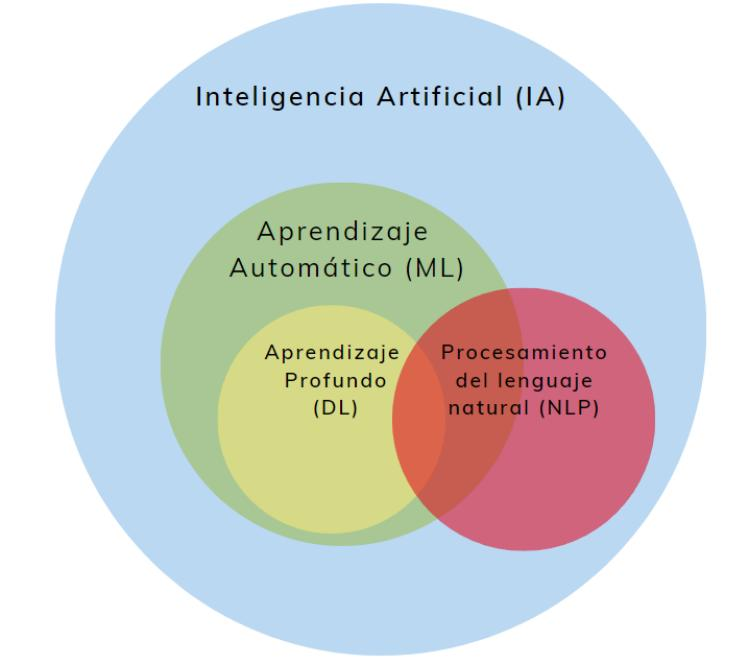

In [100]:
ur.display_base64_image(images_b64_chunks_1[2]['images_b64'])

In [28]:
text_chunks_2, tables_html_chunks_2, images_b64_chunks_2 = ur.extract_text_with_page_mapping_v2(chunks_docs_2,chapters_2,chapter_ids_2,'doc_2',min_page_number=7,save=True)

Mapeando Capítulo: PRESENTACIÓN - Element_id: 29a9e1cf-7f32-4811-99f2-35d7e88d74e8
Mapeando Capítulo: RESUMEN - Element_id: 91ab54fd-2b25-45fb-9514-a8b9200206b9
Mapeando Capítulo: 1. INTRODUCCIÓN - Element_id: 48c9b959-1f02-4a1d-ab45-b85226aad76b
Mapeando Capítulo: 2. IMPACTOS AMBIENTALES - Element_id: 1f3b3cf5-5fe1-472e-9979-c6c304dc14d7
Mapeando Capítulo: Impactos potenciales asociados a golondrinas de mar - Element_id: 12e10bbe-6a10-4dc7-9454-67ac923e96b6
Mapeando Capítulo: 3.2 Procedimientos específicos - Element_id: b4619eb2-ef0f-4089-ad22-0f9313ffc2de
Mapeando Capítulo: 3.3 Entrega de datos - Element_id: d5823a7c-daba-4c7a-b65c-4187294df021
Mapeando Capítulo: 4. MEDIDAS O COMPROMISOS AMBIENTALES VOLUNTARIOS - Element_id: 86c31bfb-6b91-4244-8883-3ea917b2c3e4
Mapeando Capítulo: 5. PLAN DE SEGUIMIENTO - Element_id: 984b671b-a328-435b-be21-f34ec7d76de6
Mapeando Capítulo: 5.1 Recolección y resguardo - Element_id: ca7a3a08-758c-4554-a26e-5d1563f14f8d
Mapeando Capítulo: 5.3 Proceso de l

In [29]:
text_chunks_3, tables_html_chunks_3, images_b64_chunks_3 = ur.extract_text_with_page_mapping_v2(chunks_docs_3,chapters_3,chapter_ids_3,'doc_3',min_page_number=3,save=True)

Mapeando Capítulo: 1. Introduction - Element_id: 59c2eca8-b709-485c-9407-3cf1226f2428
Mapeando Capítulo: 2. Approach - Element_id: 54175f62-45e1-46be-9c4a-1d092d04c8c8
Mapeando Capítulo: 3. Experiment - Element_id: 57e09e28-3df4-418f-8ef8-0324477413a1
Mapeando Capítulo: 4. Discussion - Element_id: c9b10eb6-ec7e-4a13-9207-04b9a54af6fb
Mapeando Capítulo: 5. Conclusion, Limitation, and Future Work - Element_id: fb3f7fd7-86ed-4423-ba1b-bc150d34f0de
Mapeando Capítulo: References - Element_id: 10e62350-276e-4277-88d1-b91a77a9600a
Ruta creada: data/chunks_docs/doc_3


In [31]:
images_b64_chunks_1[0]

{'images_b64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADWAIQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiobu7trC1kury4it7eIbpJZnCIg9STwKAJq51/AHg+R2dvC+jlmOSTZR8n8q57UfjL4biumstEiv8AxDfDP7nS7dpB9d3AI91zVP7X8V/FP/HtZad4Tsm/5aXDC5uceoGNv4EKaAOmufBHgWyt3uLr

In [64]:
import os
import base64
def guardar_imagenes_b64(imagen_b64, nombre_archivo, path):
    os.makedirs(path, exist_ok=True)

    imagen_b64_final = base64.b64decode(imagen_b64)
    ruta_completa = os.path.join(path, nombre_archivo)
    with open(ruta_completa, 'wb') as f:
        f.write(imagen_b64_final)

    return ruta_completa

def imagen_a_base64(imagen):
    with open(imagen, 'rb') as f:
        imagen_b64 = f.read()
    # Codificar la imagen en base64
    imagen_b64_actual = base64.b64encode(imagen_b64).decode('utf-8')

    return imagen_b64_actual

import os

def filtrar_imagenes(images_b64_list, carpeta_eliminadas):
    eliminadas = [imagen_a_base64(carpeta_eliminadas+'/'+im)  for im in set(os.listdir(carpeta_eliminadas))]
    return [img for img in images_b64_list if img['images_b64'] not in eliminadas]


In [ ]:
#guardar_imagenes_b64(images_b64_chunks_1[0]['images_b64'], 'logo_uchile.png', 'data/imagenes_eliminadas')

'data/imagenes_eliminadas/logo_uchile.png'

In [ ]:
#guardar_imagenes_b64(images_b64_chunks_2[0]['images_b64'], 'logo_SEA_azul.png', 'data/imagenes_eliminadas')
#guardar_imagenes_b64(images_b64_chunks_2[2]['images_b64'], 'logo_SEA_ori.png', 'data/imagenes_eliminadas')
#guardar_imagenes_b64(images_b64_chunks_2[3]['images_b64'], 'logo_SEA_gris.png', 'data/imagenes_eliminadas')
#guardar_imagenes_b64(images_b64_chunks_2[2]['images_b64'], 'golo_cortada.png', 'data/imagenes_eliminadas')

'data/imagenes_eliminadas/logo_SEA_gris.png'

In [ ]:
#guardar_imagenes_b64(images_b64_chunks_3[0]['images_b64'], 'logo_deepseek.png', 'data/imagenes_eliminadas')

'data/imagenes_eliminadas/logo_deepseek.png'

In [71]:
images_b64_chunks_1 = filtrar_imagenes(images_b64_chunks_1, 'data/imagenes_eliminadas')
images_b64_chunks_2 = filtrar_imagenes(images_b64_chunks_2, 'data/imagenes_eliminadas')
images_b64_chunks_3 = filtrar_imagenes(images_b64_chunks_3, 'data/imagenes_eliminadas')

Imagen 0:


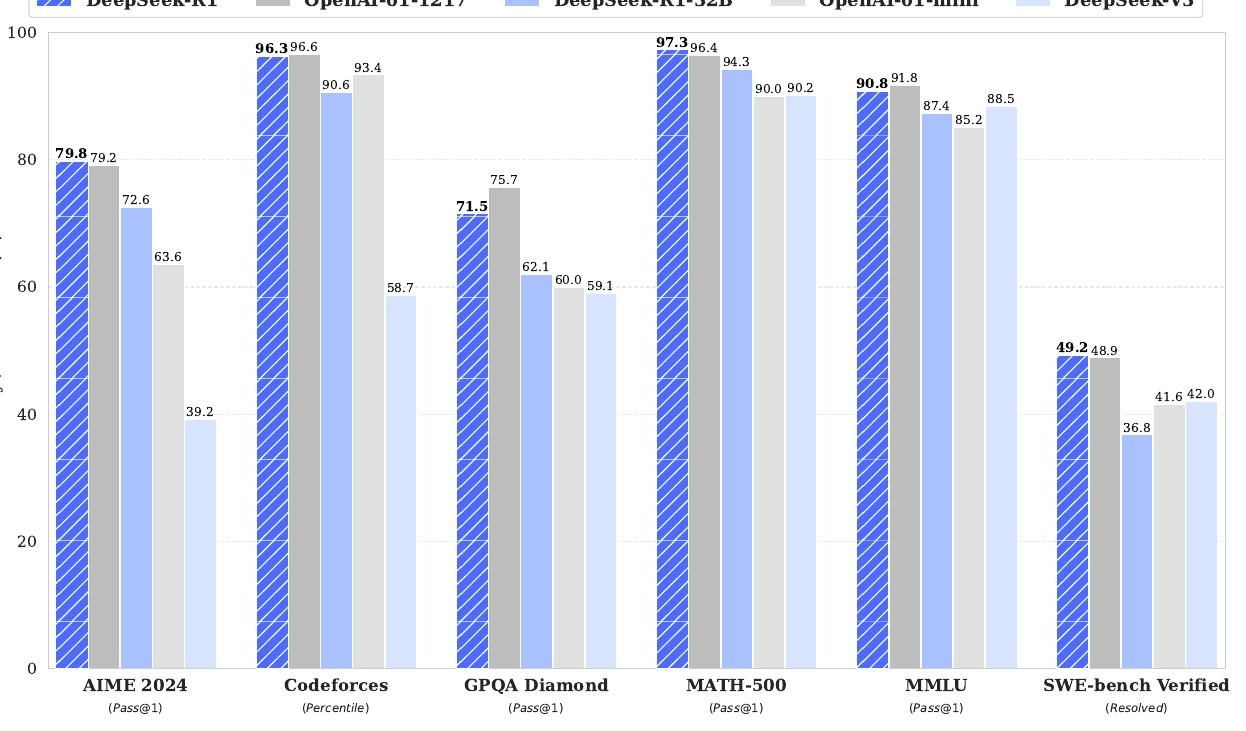

None
Imagen 1:


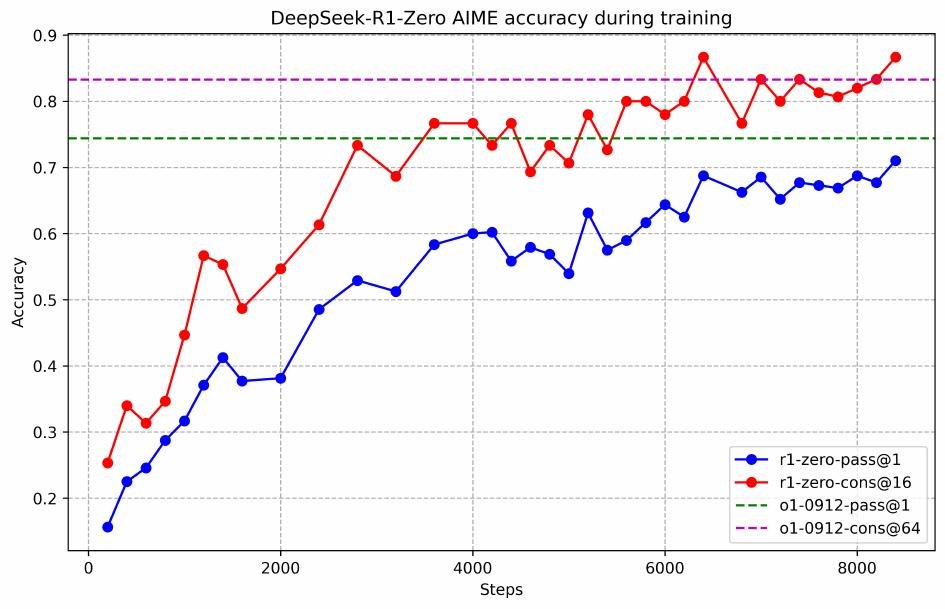

None
Imagen 2:


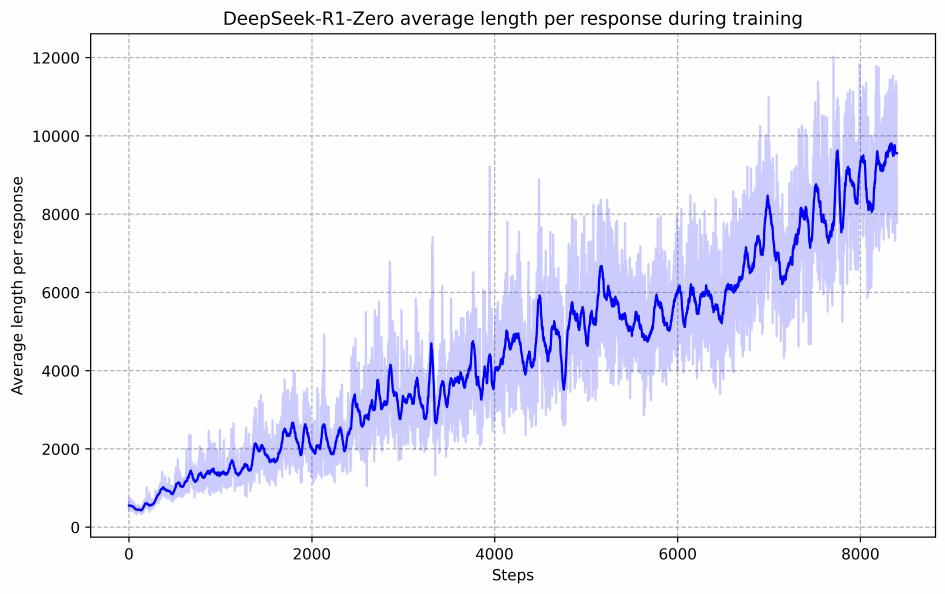

None


In [72]:
for i,im in enumerate(images_b64_chunks_3):
    print(f"Imagen {i}:")
    print(ur.display_base64_image(im['images_b64']))

## Gemini API

In [74]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    temperature=0
)

In [75]:
# Batch processing
time_start = time.time()
batch_results = ur.process_texts(text_chunks_1,llm
                              ,text_key='text'
                              ,name_dir='doc_1'
                              ,save = True
                              ,use_batch=False
                              ,max_concurrency=3)
time_end = time.time()
time_elapsed = time_end - time_start
print(f"processing time: {time_elapsed:.2f} seconds")

Procesando secuencialmente: 100%|██████████| 22/22 [02:46<00:00,  7.56s/it]

Cantidad de tokens procesados: 35079
La ruta ya existe: data/chunks_docs/doc_1
processing time: 169.60 seconds


In [103]:
text_chunks_3

[{'text': 'DeepSeek-R1: Incentivizing Reasoning Capability in LLMs via Reinforcement Learning\nDeepSeek-AI\nresearch@deepseek.com\nAbstract\nWe introduce our first-generation reasoning models, DeepSeek-R1-Zero and DeepSeek-R1. DeepSeek-R1-Zero, a model trained via large-scale reinforcement learning (RL) without super- vised fine-tuning (SFT) as a preliminary step, demonstrates remarkable reasoning capabilities. Through RL, DeepSeek-R1-Zero naturally emerges with numerous powerful and intriguing reasoning behaviors. However, it encounters challenges such as poor readability, and language mixing. To address these issues and further enhance reasoning performance, we introduce DeepSeek-R1, which incorporates multi-stage training and cold-start data before RL. DeepSeek- R1 achieves performance comparable to OpenAI-o1-1217 on reasoning tasks. To support the research community, we open-source DeepSeek-R1-Zero, DeepSeek-R1, and six dense models (1.5B, 7B, 8B, 14B, 32B, 70B) distilled from Deep

In [102]:
batch_results

[{'summary': 'DeepSeek-AI presenta sus modelos de razonamiento de primera generación, DeepSeek-R1-Zero y DeepSeek-R1. DeepSeek-R1-Zero, entrenado mediante aprendizaje por refuerzo a gran escala sin ajuste fino supervisado, muestra capacidades de razonamiento notables. DeepSeek-R1 incorpora entrenamiento multietapa y datos de inicio en frío antes del aprendizaje por refuerzo, alcanzando un rendimiento comparable a OpenAI-o1 en tareas de razonamiento. Para apoyar a la comunidad de investigación, se ofrece DeepSeek-R1-Zero, DeepSeek-R1 y seis modelos densos destilados de DeepSeek-R1 basados en Qwen y Llama.',
  'page_number': [1, 2],
  'filename': 'DeepSeek_R1.pdf',
  'chapter_id': '',
  'status': 'success'},
 {'summary': 'Se presenta DeepSeek-R1, un modelo de lenguaje grande (LLM) desarrollado mediante aprendizaje por refuerzo (RL) y ajuste fino supervisado (SFT). DeepSeek-R1-Zero emerge naturalmente con capacidades de razonamiento poderosas, mejorando significativamente en benchmarks co

In [76]:
# Batch processing
time_start = time.time()
batch_results_tables = ur.process_texts(tables_html_chunks_1,llm
                              ,text_key='text_html'
                              ,name_dir='doc_1'
                              ,save = True
                              ,use_batch=False
                              ,max_concurrency=3)
time_end = time.time()
time_elapsed = time_end - time_start
print(f"processing time: {time_elapsed:.2f} seconds")

Procesando secuencialmente: 100%|██████████| 31/31 [03:44<00:00,  7.24s/it]

Cantidad de tokens procesados: 30622
La ruta ya existe: data/chunks_docs/doc_1
processing time: 224.37 seconds


In [ ]:
# Batch processing
time_start = time.time()
batch_results_image = ur.process_images(images_b64_chunks_1,llm
                              ,imagen_key='images_b64'
                              ,resize=(328,328)
                              ,name_dir='doc_1'
                              ,save = True)
time_end = time.time()
time_elapsed = time_end - time_start
print(f"Batch processing time: {time_elapsed:.2f} seconds")

Procesando secuencialmente:  57%|█████▋    | 13/23 [01:51<01:28,  8.88s/it]

Limite Excedido, esperando 60 segundos


Procesando secuencialmente:  87%|████████▋ | 20/23 [03:48<00:30, 10.29s/it]

Limite Excedido, esperando 60 segundos


Procesando secuencialmente: 100%|██████████| 23/23 [05:13<00:00, 13.62s/it]

Cantidad de tokens procesados: 198915
La ruta ya existe: data/chunks_docs/doc_1
Batch processing time: 313.28 seconds


## doc 2

In [ ]:
# Batch processing
time_start = time.time()
batch_results = ur.process_texts(text_chunks_2
                              ,llm
                              ,text_key='text'
                              ,name_dir='doc_2'
                              ,save = True
                              ,use_batch=False
                              ,max_concurrency=3)
time_end = time.time()
time_elapsed = time_end - time_start
print(f"processing time: {time_elapsed:.2f} seconds")

Procesando secuencialmente: 100%|██████████| 14/14 [01:45<00:00,  7.56s/it]

Cantidad de tokens procesados: 23293
La ruta ya existe: data/chunks_docs/doc_1
processing time: 107.94 seconds


In [ ]:
# Batch processing
time_start = time.time()
batch_results_tables = ur.process_texts(tables_html_chunks_2
                              ,llm
                              ,text_key='text_html'
                              ,name_dir='doc_2'
                              ,save = True
                              ,use_batch=False
                              ,max_concurrency=3)
time_end = time.time()
time_elapsed = time_end - time_start
print(f"processing time: {time_elapsed:.2f} seconds")

Procesando secuencialmente: 100%|██████████| 10/10 [01:12<00:00,  7.21s/it]

Cantidad de tokens procesados: 5158
La ruta ya existe: data/chunks_docs/doc_1
processing time: 72.06 seconds


In [79]:
# Batch processing
time_start = time.time()
batch_results_image = ur.process_images(images_b64_chunks_2
                              ,llm
                              ,imagen_key='images_b64'
                              ,resize=(328,328)
                              ,name_dir='doc_2'
                              ,save = True)
time_end = time.time()
time_elapsed = time_end - time_start
print(f"Batch processing time: {time_elapsed:.2f} seconds")

Procesando secuencialmente:  17%|█▋        | 7/42 [00:54<04:29,  7.69s/it]

Limite Excedido, esperando 60 segundos


Procesando secuencialmente:  26%|██▌       | 11/42 [02:30<07:32, 14.61s/it]

Limite Excedido, esperando 60 segundos


Procesando secuencialmente:  50%|█████     | 21/42 [04:46<02:57,  8.47s/it]

Limite Excedido, esperando 60 segundos


Procesando secuencialmente:  79%|███████▊  | 33/42 [07:21<01:15,  8.40s/it]

Limite Excedido, esperando 60 segundos


Procesando secuencialmente:  95%|█████████▌| 40/42 [09:15<00:19,  9.89s/it]

Limite Excedido, esperando 60 segundos


Procesando secuencialmente: 100%|██████████| 42/42 [10:31<00:00, 15.03s/it]

Cantidad de tokens procesados: 202320
La ruta ya existe: data/chunks_docs/doc_1
Batch processing time: 631.46 seconds


## doc 3

In [80]:
# Batch processing
time_start = time.time()
batch_results = ur.process_texts(text_chunks_3
                              ,llm
                              ,text_key='text'
                              ,name_dir='doc_3'
                              ,save = True
                              ,use_batch=False
                              ,max_concurrency=3)
time_end = time.time()
time_elapsed = time_end - time_start
print(f"processing time: {time_elapsed:.2f} seconds")

Procesando secuencialmente: 100%|██████████| 7/7 [01:02<00:00,  8.95s/it]

Cantidad de tokens procesados: 11112
La ruta ya existe: data/chunks_docs/doc_3
processing time: 64.13 seconds


In [81]:
# Batch processing
time_start = time.time()
batch_results_tables = ur.process_texts(tables_html_chunks_3
                              ,llm
                              ,text_key='text_html'
                              ,name_dir='doc_3'
                              ,save = True
                              ,use_batch=False
                              ,max_concurrency=3)
time_end = time.time()
time_elapsed = time_end - time_start
print(f"processing time: {time_elapsed:.2f} seconds")

Procesando secuencialmente: 100%|██████████| 6/6 [00:44<00:00,  7.39s/it]

Cantidad de tokens procesados: 5718
La ruta ya existe: data/chunks_docs/doc_3
processing time: 44.34 seconds


In [82]:
# Batch processing
time_start = time.time()
batch_results_image = ur.process_images(images_b64_chunks_3
                              ,llm
                              ,imagen_key='images_b64'
                              ,resize=(328,328)
                              ,name_dir='doc_3'
                              ,save = True)
time_end = time.time()
time_elapsed = time_end - time_start
print(f"Batch processing time: {time_elapsed:.2f} seconds")

Procesando secuencialmente: 100%|██████████| 3/3 [00:24<00:00,  8.24s/it]

Cantidad de tokens procesados: 255978
La ruta ya existe: data/chunks_docs/doc_3
Batch processing time: 24.73 seconds
